In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('Group_20_data_cleaned.csv')
df.drop('Unnamed: 0', axis = 1 , inplace = True)
df["Letter"] = pd.factorize(df['Letter'])[0]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,1:].to_numpy(), df.Letter.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(12800, 16) (4000, 16) (3200, 16)
(12800,) (4000,) (3200,)


## XGBoost

In [ ]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # fit model no training data
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.84%


## SK learn Bagging classifier

In [ ]:
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# from sklearn.datasets import make_classification
# # X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
# clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train, y_train)
# clf.predict(X_val)
# # array([1])

## Voting Classifier

In [ ]:
# # Reference Code

# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# clf = KNeighborsClassifier
# clf3 = GaussianNB()

# eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
# eclf1 = eclf1.fit(X_train, y_train)

# print(eclf1.predict(X_val))

# np.array_equal(eclf1.named_estimators_.lr.predict(X),eclf1.named_estimators_['lr'].predict(X_val))

# eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')
# eclf2 = eclf2.fit(X_train, y_train)
# print(eclf2.predict(X_val))


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


clf1 = LogisticRegression(penalty='l2',)
clf2 = LogisticRegression(penalty='l2', solver='saga')
clf3 = LogisticRegression(penalty='l1', solver='liblinear')
clf4 = LogisticRegression(penalty='l1', solver='liblinear')
clf5 = RandomForestClassifier(n_estimators=15, 
                              max_depth=10,
                              random_state=1)
clf6 = RandomForestClassifier(n_estimators=20, 
                              max_depth=20,
                              random_state=1)
clf7 = RandomForestClassifier(n_estimators=25, 
                              max_depth=30,
                              random_state=1)
clf8 = RandomForestClassifier(n_estimators=15, 
                              max_depth=10,
                              random_state=1)
clf9 = RandomForestClassifier(n_estimators=20, 
                              max_depth=20,
                              random_state=1)
clf10 = RandomForestClassifier(n_estimators=25, 
                              max_depth=30,
                              random_state=1)
clf11 = RandomForestClassifier(n_estimators=15, 
                              max_depth=10,
                              random_state=1)
clf12 = RandomForestClassifier(n_estimators=20, 
                              max_depth=10,
                              random_state=1)
clf13 = KNeighborsClassifier(n_neighbors=5,
                            weights='uniform', 
                            algorithm='auto', 
                            metric='euclidean')
clf14 = KNeighborsClassifier(n_neighbors=7, 
                            weights='uniform', 
                            algorithm='ball_tree', 
                            metric='euclidean')
clf15 = KNeighborsClassifier(n_neighbors=9, 
                            weights='uniform', 
                            algorithm='brute', 
                            metric='minkowski')
clf16 = KNeighborsClassifier(n_neighbors=5, 
                            weights='distance', 
                            algorithm='ball_tree', 
                            metric='manhattan')
clf17 = KNeighborsClassifier(n_neighbors=7, 
                            weights='distance', 
                            algorithm='auto', 
                            metric='minkowski')
clf18 = KNeighborsClassifier(n_neighbors=3, 
                            weights='distance', 
                            algorithm='auto', 
                            metric='manhattan')
clf19 = RidgeClassifierCV(alphas=(0.1, 1.0), 
						fit_intercept=True)
clf20 = RidgeClassifierCV(alphas=(0.1, 1.0), 
						fit_intercept=True)
clf21 = RidgeClassifier(alpha=1.0,
						fit_intercept=True)
clf22 = RidgeClassifier(alpha=0.1,
						fit_intercept=True)


ensemble = VotingClassifier(estimators=[('LogisticRegression1', clf1), 
                                     ('LogisticRegression2', clf2), 
                                     ('LogisticRegression3', clf3), 
                                     ('LogisticRegression4', clf4), 
                                     ('RandomForestClassifier1', clf5), 
                                     ('RandomForestClassifier2', clf6), 
                                     ('RandomForestClassifier3', clf7), 
                                     ('RandomForestClassifier4', clf8), 
                                     ('RandomForestClassifier5', clf9), 
                                     ('RandomForestClassifier6', clf10), 
                                     ('RandomForestClassifier7', clf11), 
                                     ('RandomForestClassifier8', clf12), 
                                     ('KNeighborsClassifier1', clf13), 
                                     ('KNeighborsClassifier2', clf14), 
                                     ('KNeighborsClassifier3', clf15), 
                                     ('KNeighborsClassifier4', clf16), 
                                     ('KNeighborsClassifier5', clf17), 
                                     ('KNeighborsClassifier6', clf18), 
                                     ('RidgeClassifierCV1', clf19), 
                                     ('RidgeClassifierCV2', clf20), 
                                     ('RidgeClassifier1', clf21), 
                                     ('RidgeClassifier2', clf22)
                                    ], 
                         voting='hard')
ensemble = ensemble.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ensemble_predictions = ensemble.predict(X_val)

print(classification_report(y_val, ensemble_predictions),'\n\n')
print("Confusion matrix: \n",confusion_matrix(y_val, ensemble_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       119
           1       0.94      0.94      0.94       136
           2       0.93      0.95      0.94       148
           3       0.91      0.94      0.92       114
           4       0.93      0.91      0.92       137
           5       0.95      0.90      0.92       115
           6       0.86      0.97      0.91       128
           7       0.93      1.00      0.96       131
           8       0.98      0.89      0.93        98
           9       0.93      0.97      0.95       142
          10       0.95      0.98      0.97       126
          11       0.89      0.98      0.93       136
          12       0.90      0.93      0.92       123
          13       0.92      0.95      0.93       131
          14       0.96      0.96      0.96       112
          15       0.91      0.86      0.88       119
          16       0.95      0.94      0.95       132
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


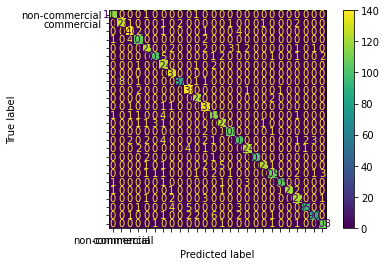

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ensemble, X_val, y_val, display_labels=['non-commercial','commercial'])

# Comparing single models with Ensemble

# Ensemble model

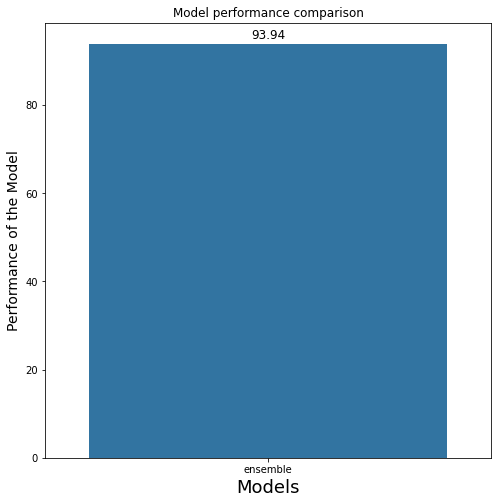

In [ ]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_results = {"Model Names" : ['ensemble'],
        "Accuracy": [accuracy_score(ensemble_predictions, y_val)*100]}
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=18)
plt.ylabel("Performance of the Model", size=14)
plt.title("Model performance comparison")
plt.show()

## Single models

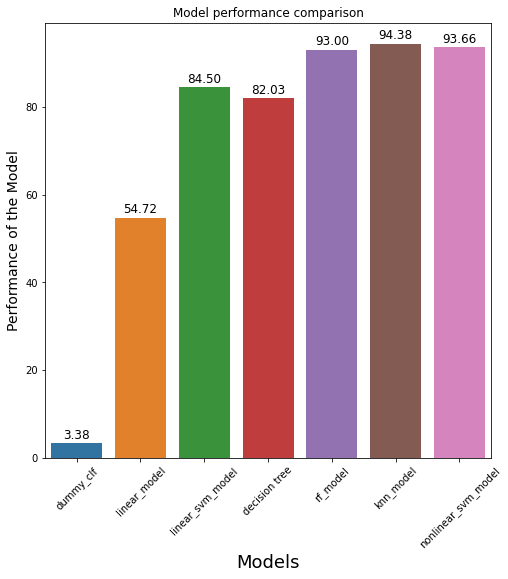